# sc-omics "analysis"

I could not put test data within the git repository, too big.
Please ask me if you want some.

Cheers, Léo

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import scanpy as sc
import anndata as ad
from utilities import *
%matplotlib inline

/home/leo/dvlp/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


## Updating the gene names
The following cell allows you to transform a csv file that contains Ensembl ids into a csv file that contains the corresponding gene names, easing the data analysis.

The function takes a .csv file name fi (`your_name.csv`), and transform it into a new file (`your_name.Genes.csv`).

### THIS CELL IS NOT NECESSARY FOR EVERY RUN, JUST THE FIRST ONE

In [ ]:
f = 'path/to/data.csv'
enseml2gene(f, f_ensembl='utilities/Ensembl2Gene.txt')

# Loading the data
The next cell loads the data.
If the data has never be load before, it will also perform the usual normalisation and filtering functions (extracted from the tutorial in scanpy tutorial [website](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html)):
- filtering out genes that are expressed in less than 3 cells
- filtering out cells that have fewer than 200 genes expressed
- normalization of cell total expression for a target sum of expressions at $10^4$
- logarithmize the expression
- only keeping the highly variable genes
- scale the data
- PCA
- umap
- Leiden clustering (graph Neighborhood clustering, neighbourhood of size $10$ with $40$ PCs and a Leiden clustering with a threshold value of $0.25$)

## Filtering againt mitotic cells and number of counts
It is possible to filter out cells with too high number of counts and/or to high percent of mitotic expression compared to other expression.

To do so you need to change the parameter `filter_ncounts` (resp. `filter_mito`) to either `True` to be asked for a threshold value or to a digit value to perform the thresholding directly.

If you choose not to enter the value directly (`filter_ncounts` or `filter_mito` at `True`), then an histogram of the distribution will be shown to you to help choose a decent value.

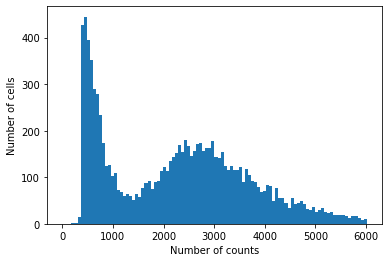

Please enter the threshold value for the maximum number of counts: 2000
You are removing 5719 cells over a total of 9950:


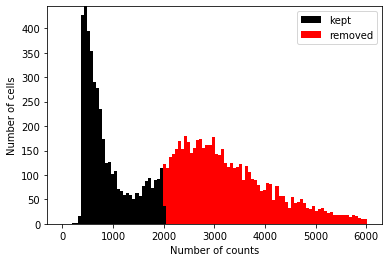

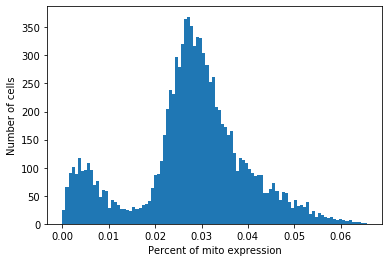

Please enter the threshold value for the maximum percent of mito expression: .05
You are removing 451 cells over a total of 9950:


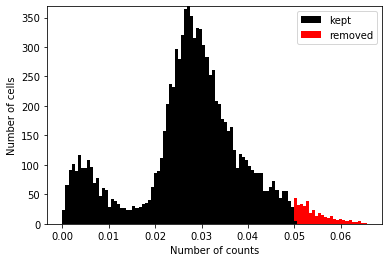

/home/leo/dvlp/miniconda3/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:297: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(data)
/home/leo/dvlp/miniconda3/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:912: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/leo/dvlp/miniconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


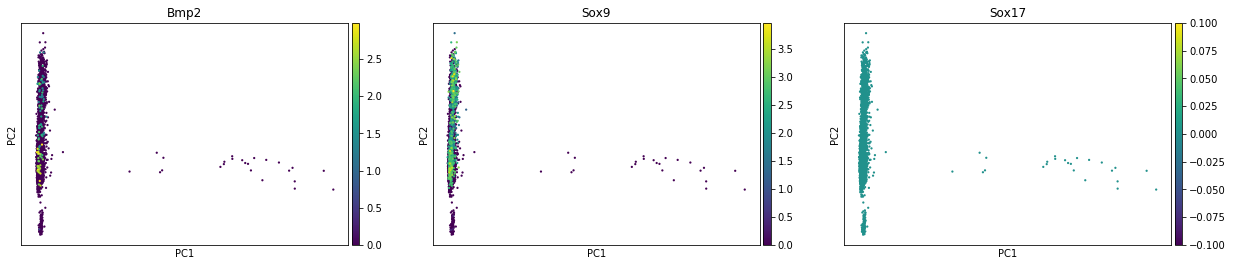

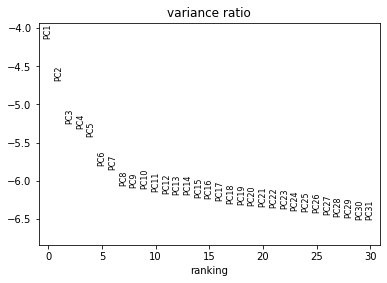

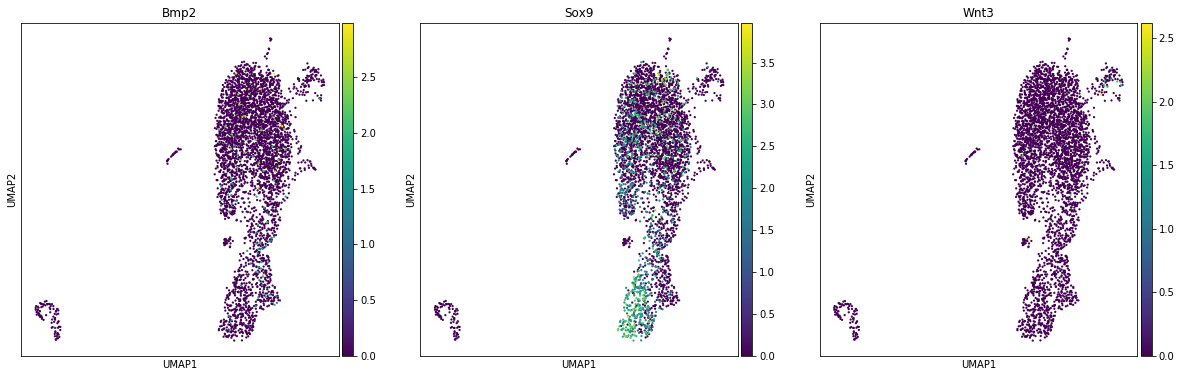

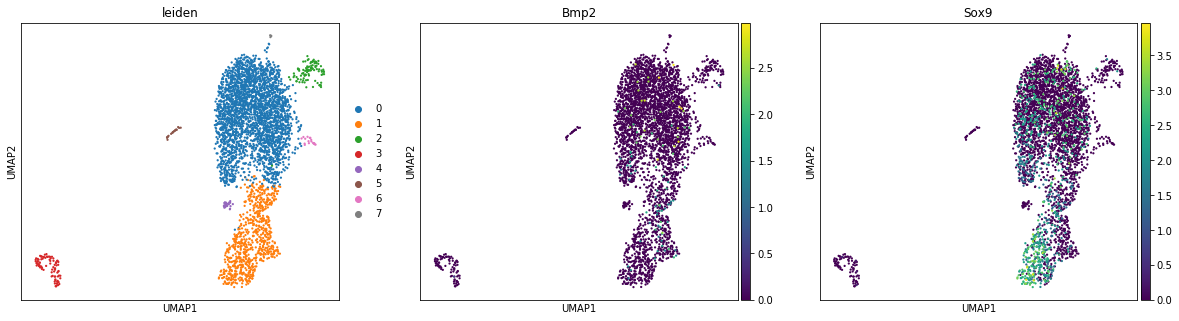

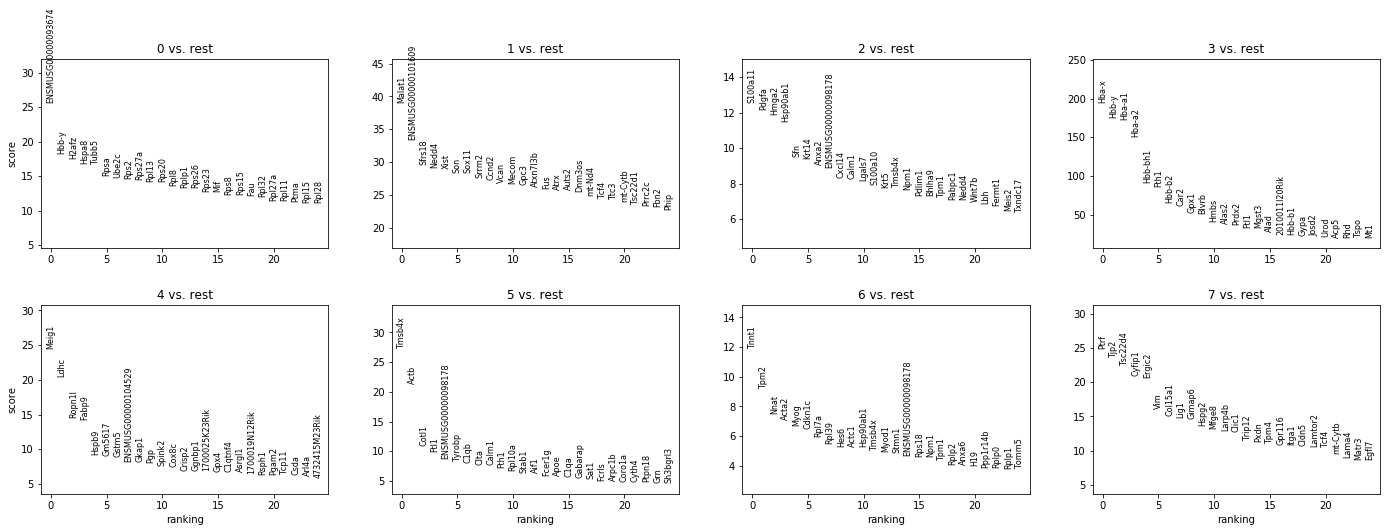

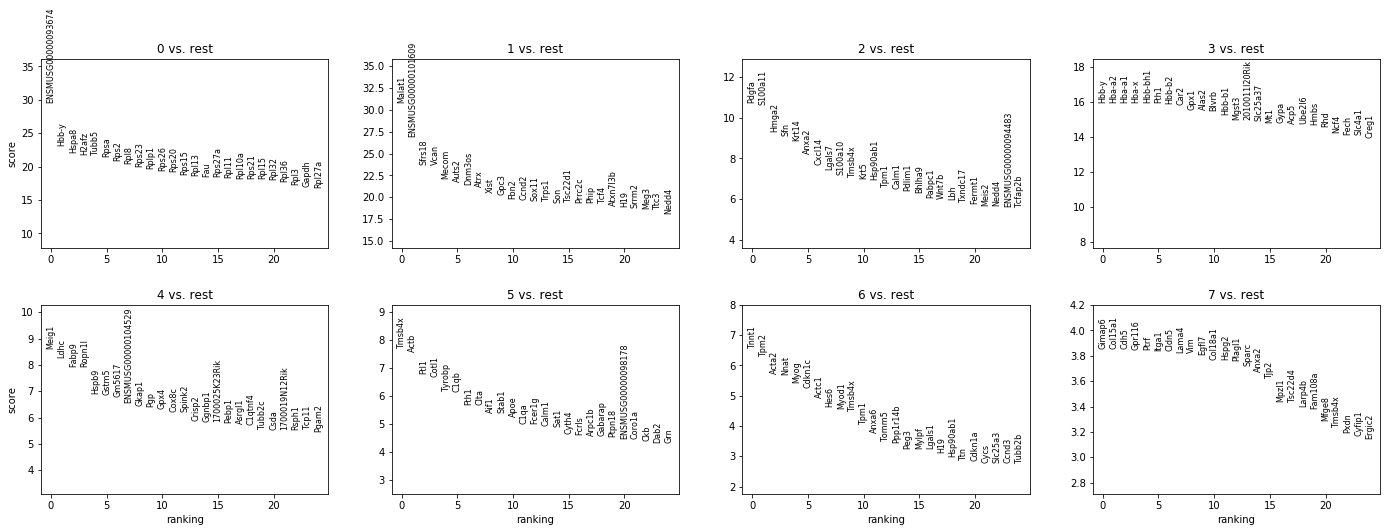

In [12]:
f = 'Data/CR_E11_5Black6FLs.Genes.csv'
adata = get_clusters_et_al(f, filter_ncounts=True, filter_mito=True, size=20, reload=True)

# New clustering and significant genes
The two following cells allow you to produce a new clustering.

### First cell
The first cell is the clustering itself:
- The first line allows you to build the neighbourhood by choose the number of neighbours and the number of PCs
- The second line allows you to compute the clustering and fixing the threshold value, as a rule of thumb, the higher the value is, the higher the number of clusters will be
- The third and fourth lines allow you to project the results of the clustering onto the umap

### Second cell
The second cell allows you to compute the most significant genes for each clusters.

Two methods are available, `'t-test'` and `'wilcoxon'`, they raise different results but I don't know the details of the methods...

Note that there is a variable `save=` in the function, it allows you to save the results of the gene ranking and it will append the `string` to the name of the file. By putting `save=None` you can avoid saving the figure

## Frist cell

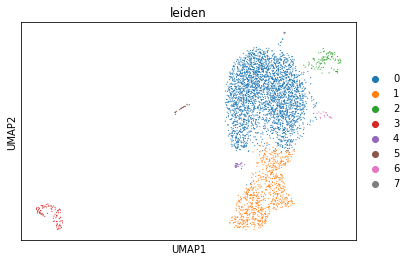

In [13]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata, .25)
sc.pl.umap(adata, color=['leiden'], size=5);

## Second cell

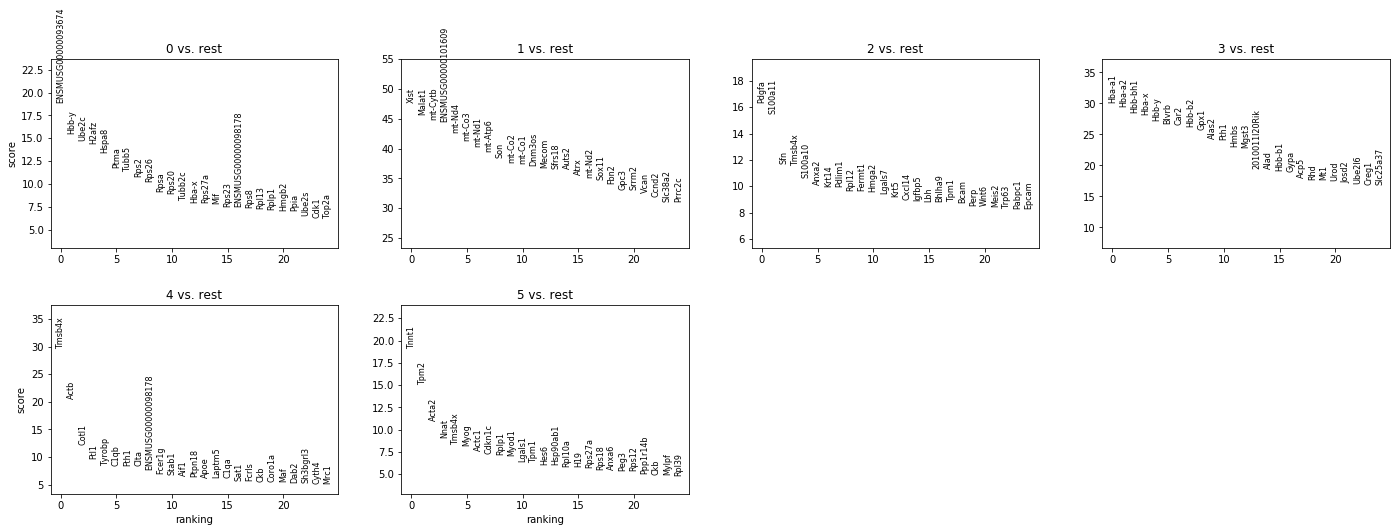

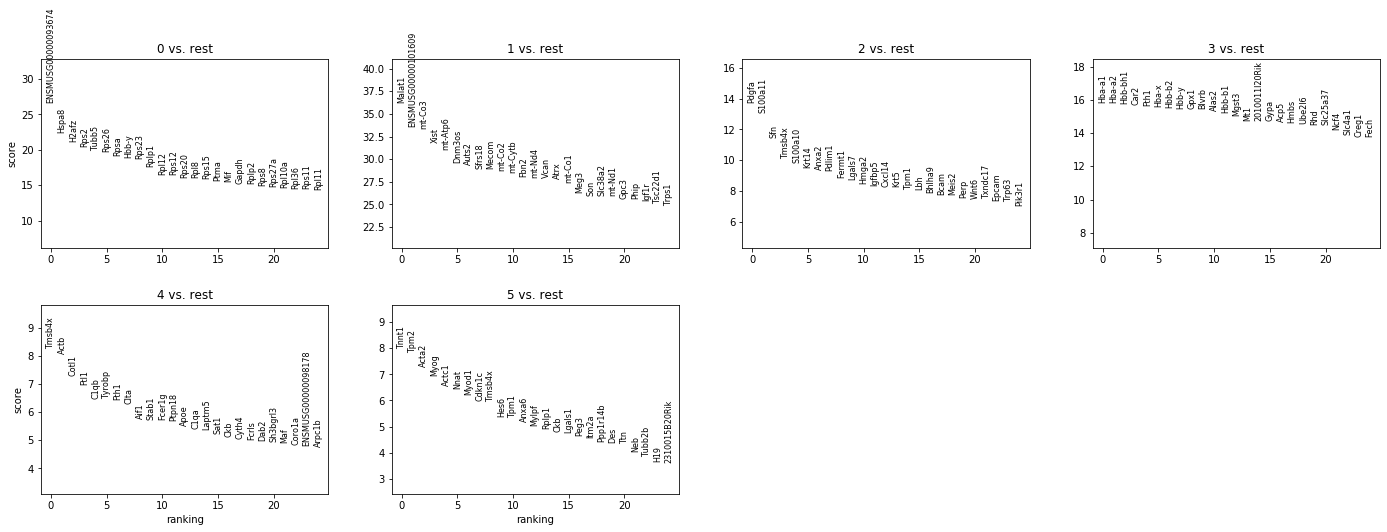

In [4]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, show=True, save='.t-test.0.25.pdf')


sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, show=True, save='.wilcoxon.0.25.pdf')

## Find genes names within the data
This function allows you to list the genes within your dataset that fit a given pattern

## Umap plots
The following cell allows you to plot the umap with clustering and gene expression paterns.

You can change the list of genes to look at by changing the list after `color=`

You can change the colormap by changing the value after `color_map=`. The most common color maps are `Reds` and `viridis` but you can find a list of available colormaps [there](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html).

You can change the size of the dots in the figures by changing the value after `size=`.

You can save the outputed figure by uncommenting the last line of the cell. The parameter of the function is the name of the output figure.

Note that for both cells, the 4th line allows you to save the figure under a given name.

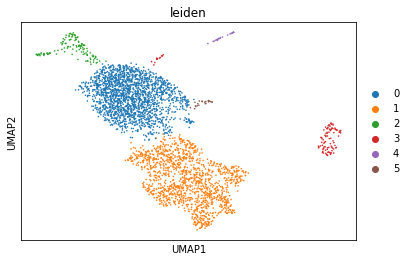

In [5]:
fig = sc.pl.umap(adata, color=['leiden'],
                 size=10, show=False, return_fig=True, color_map='Reds')

#fig.savefig('figures/UMAP.E10FL.0.095.leidenGenes.pdf')

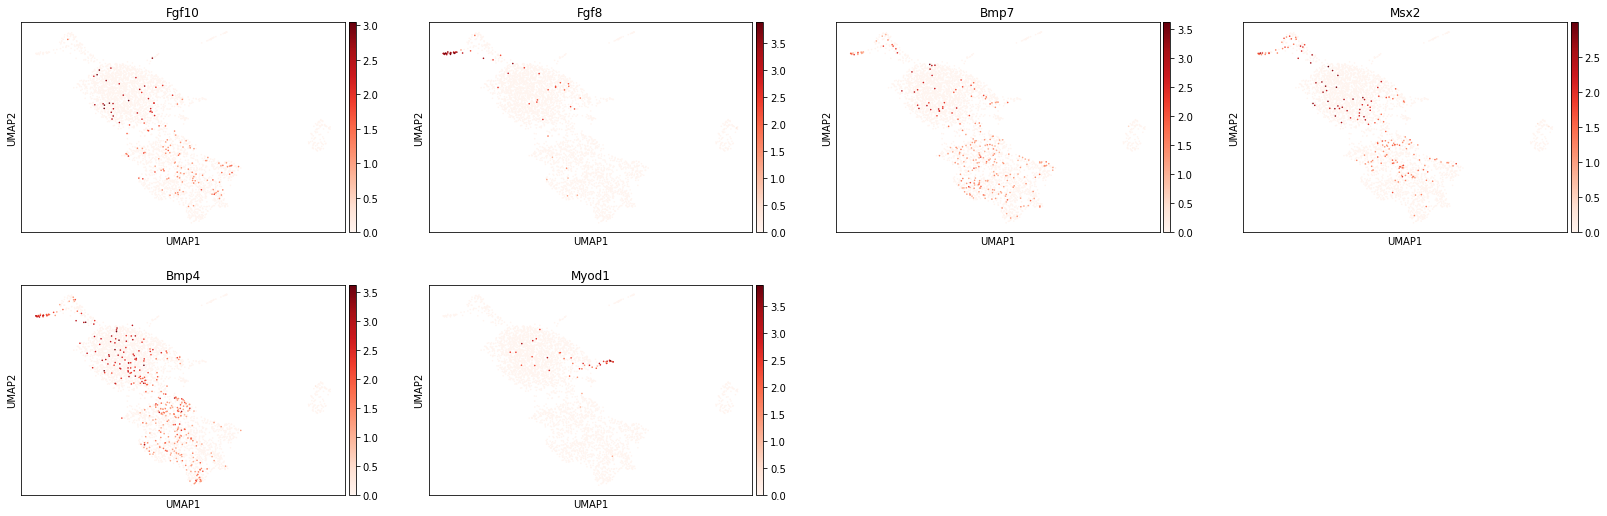

In [6]:
fig = sc.pl.umap(adata, color=['Fgf10','Fgf8','Bmp7','Msx2','Bmp4','Myod1'],
                 size=10, show=False, return_fig=True, color_map='Reds')

#fig.savefig('figures/UMAP.E9FL.0.65.Bmp2Genes.pdf')

## Histogram plots
The following cell allows you to plot histogram of gene expression distribution.

You can change the list of genes to look at by changing the list after `adata, `

You can change the number of bins by changing the value after `bins=`

You can change whether the plot is in logarithm scale or not by changing the value after `logscale=` between `True` and `False` (please make sure correctly write the capital letters)

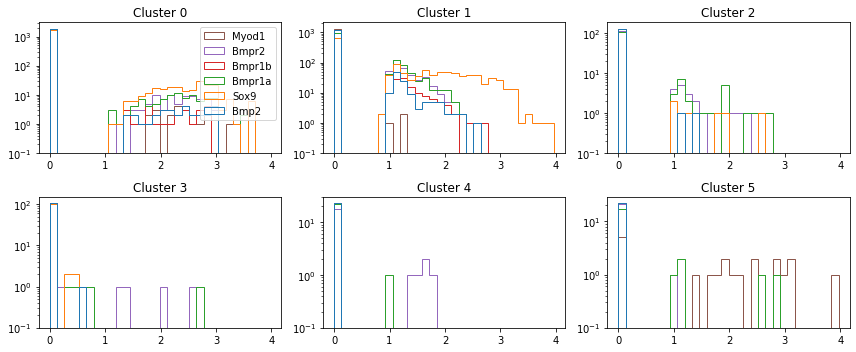

In [7]:
fig = plot_gene_distribution(adata, ['Bmp2','Sox9','Bmpr1a','Bmpr1b','Bmpr2','Myod1'],
                             bins=30, logscale=True)

#fig.savefig('figures/Histograms.E9FL.0.65.Bmp2Genes.pdf')

## Violin plots
The two following cells allow you to plot the violin plots of the distribution of some given genes.

Similarly to the histogram plots you can change the genes you want to look at by changing the list after `adata, `.

To save the figure you need to change the parameter save to a string value. The string value will be append to the name of the output file (being of the form `figures/violin<your_input>`, similarly to the [rank_gene_groups](http://localhost:8888/notebooks/Data-Analysis-Alicia.ipynb#Second-cell))

You can also change the figure size by changing the parameter `figsize=`

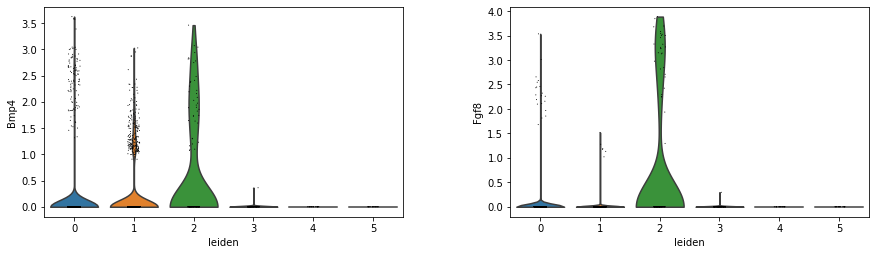

In [8]:
sc.pl.violin(adata, ['Bmp4', 'Fgf8'], groupby='leiden', save=None)

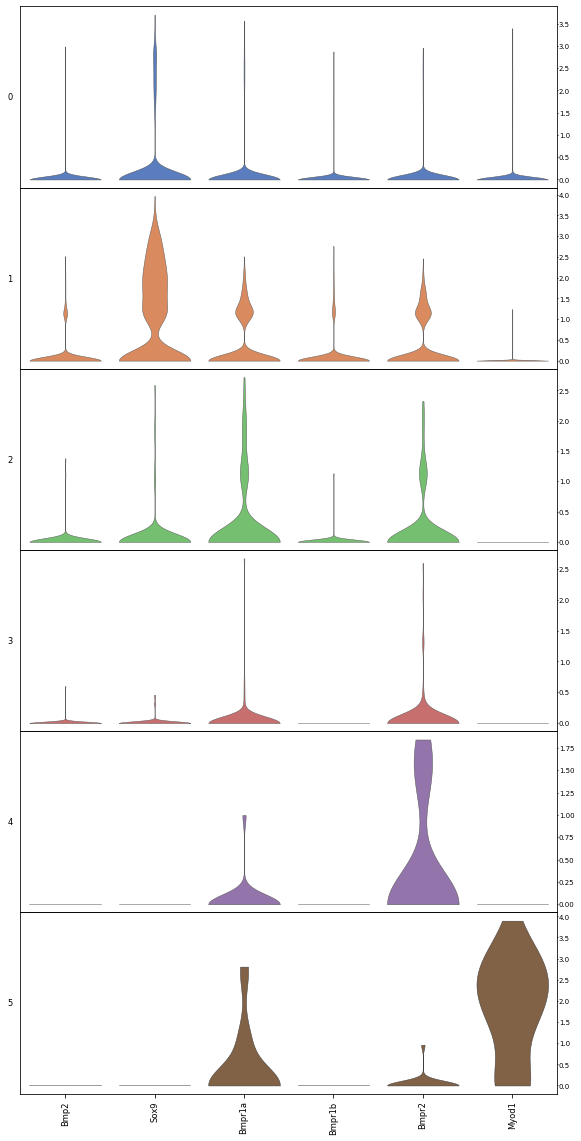

In [9]:
sc.pl.stacked_violin(adata, ['Bmp2','Sox9','Bmpr1a','Bmpr1b','Bmpr2','Myod1'],
                     groupby='leiden', figsize=(10, 20), save=None);

## Dot plots
The following cells plot the dot plot of gene intensity and presence for each cluster

You can to only average the expression accross cells that express (`mean_only_expressed=True`) or all the cells (`mean_only_expressed=False`).

You can choose to threshold the values of maximum ratio of presence of a gene within a cluster (`dot_max=.4` for example wil make the larger cirle to represent a ratio of .4).

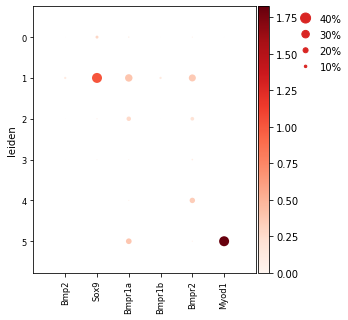

In [10]:
sc.pl.dotplot(adata, ['Bmp2','Sox9','Bmpr1a','Bmpr1b','Bmpr2','Myod1'],
              groupby='leiden',figsize=(5, 5), mean_only_expressed=False,
             dot_max=.4);